In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from getdist import plots
from getdist import mcsamples
import getdist

from matplotlib import rc, rcParams

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

## Sterile

In [2]:
labels=[r"N_{atm}",r"\Delta \gamma",r"{\rm DOM}_{\rm eff}",r"R_{\pi K}",r"R_{\nu\bar\nu}",r"\delta_J"]

In [3]:
Tchain=np.genfromtxt("./data/chains/sterile_chain.dat")
Tsample=mcsamples.MCSamples(samples=Tchain,labels=labels,names=[str(i) for i in range(6)])

In [4]:
prior_cov=np.diag((0.4,0.05,0.3,0.1,0.1,0.1))
prior_cov=prior_cov**2
prior_means=np.array([1.0,0.0,1.0,1.0,1.,0.])
prior_vecs=np.random.multivariate_normal(prior_means,prior_cov,1000000)

prior_samples=mcsamples.MCSamples(samples=prior_vecs,labels=labels,names=[str(i) for i in range(6)],
                                  #ranges=[[0,5],[-1,1],[0,2],
                                  #  [0,100],[0,100],[-1,1],
                                  #  [-31,20],[0,np.pi],[None,None]
                                  # ]
                                 )

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


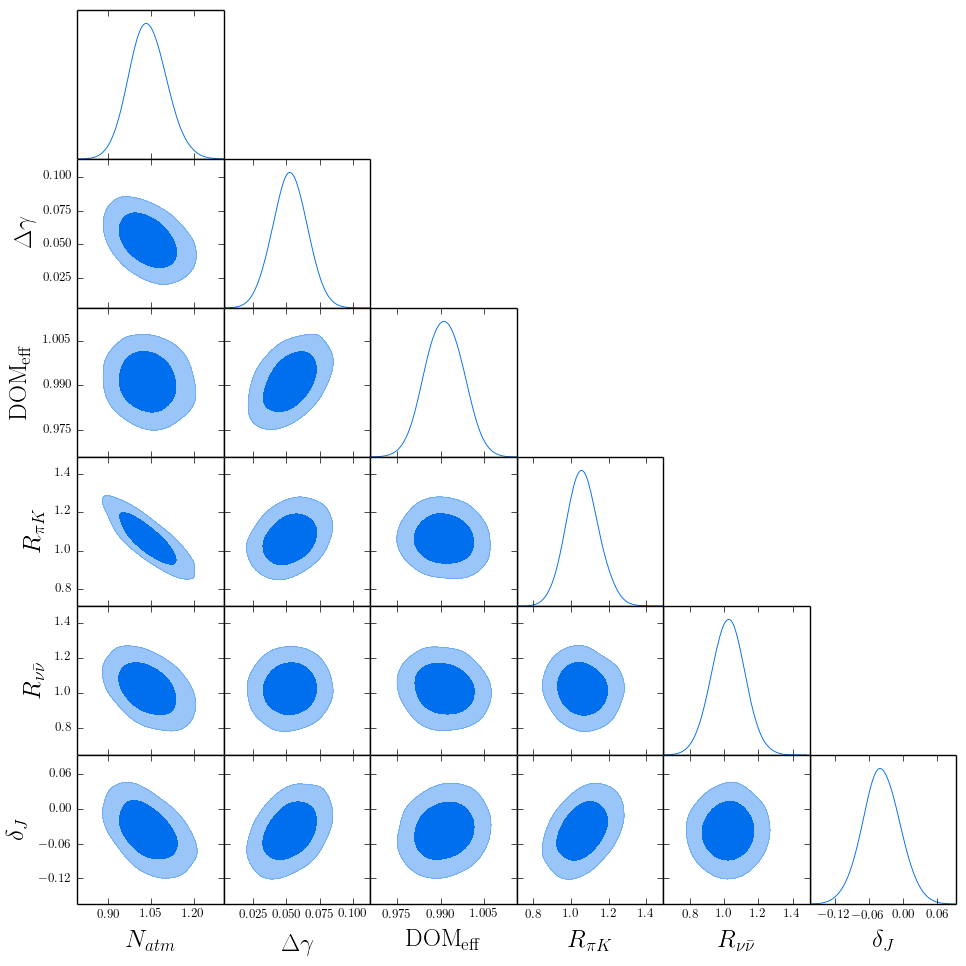

In [5]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([Tsample], 
                filled=True, legend_labels=["Posterior"],
                legend_loc="upper right",)
g.export("sterile_posterior.pdf")

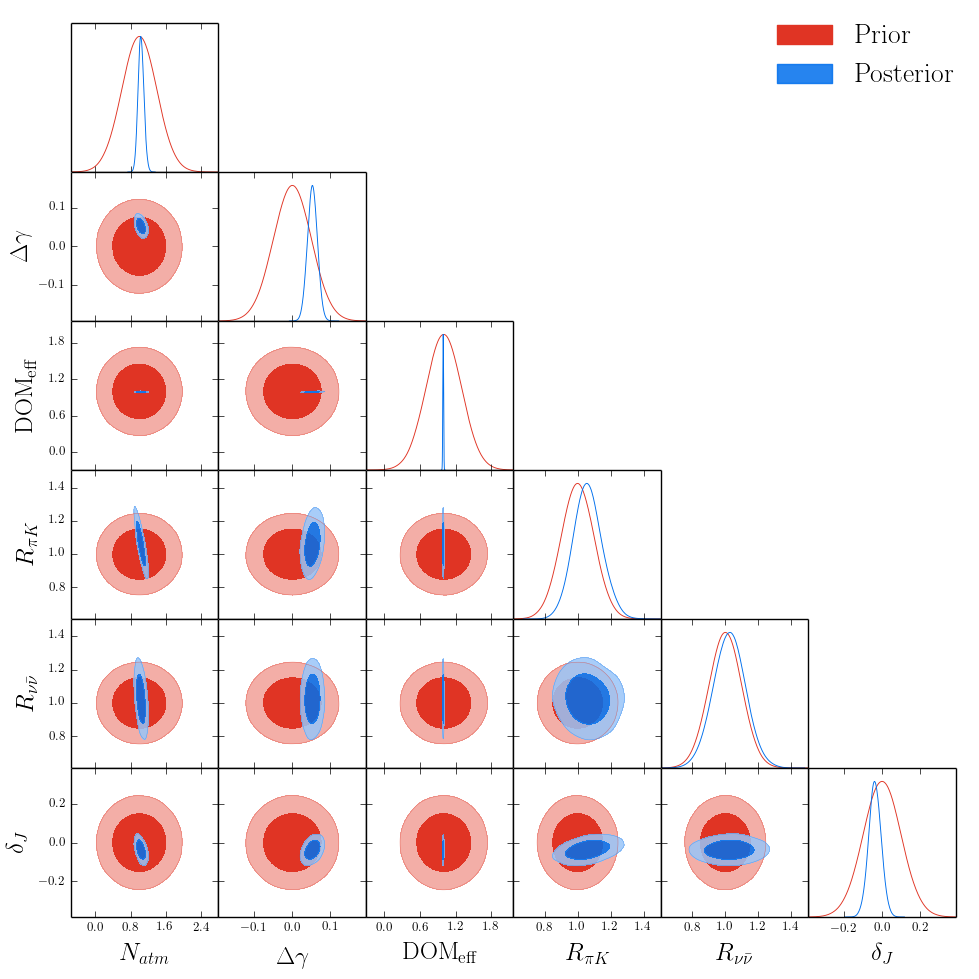

In [6]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([prior_samples,Tsample], 
                filled=True, legend_labels=["Prior","Posterior"],
                legend_loc="upper right",)
g.export("sterile_prior_posterior.pdf")

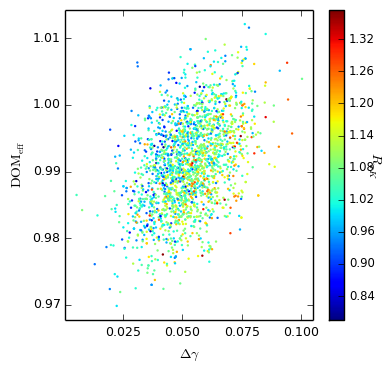

In [23]:
g = plots.getSubplotPlotter(width_inch=4)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9

g.plot_3d([Tsample],["1","2","3"])

In [4]:
print Tsample.getTable().tableTex()

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$N_{atm}        $} & $1.04^{+0.14}_{-0.13}      $\\

{\boldmath$\Delta \gamma  $} & $0.053^{+0.026}_{-0.026}   $\\

{\boldmath${\rm DOM}_{\rm eff}$} & $0.991^{+0.013}_{-0.013}   $\\

{\boldmath$R_{\pi K}      $} & $1.06^{+0.18}_{-0.17}      $\\

{\boldmath$R_{\nu\bar\nu} $} & $1.02^{+0.19}_{-0.19}      $\\

{\boldmath$\delta_J       $} & $-0.038^{+0.066}_{-0.065}  $\\
\hline
\end{tabular}


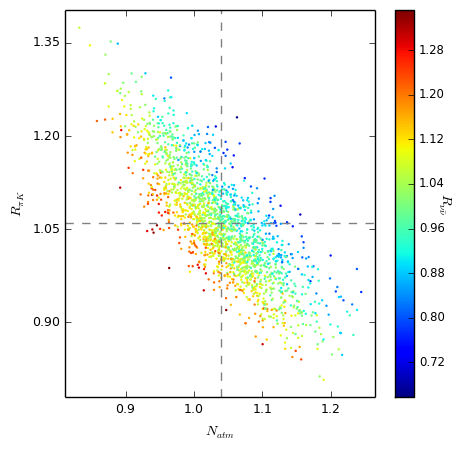

In [48]:
g = plots.getSubplotPlotter(width_inch=5)
g.settings.legend_fontsize=9
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.plot_3d([Tsample], ["0","3","4"])
#ax=g.subplots[[0]]
plt.axvline(1.04, color='gray', ls='--')
plt.axhline(1.06, color='gray', ls='--')
g.export("sterile_crazy.pdf")

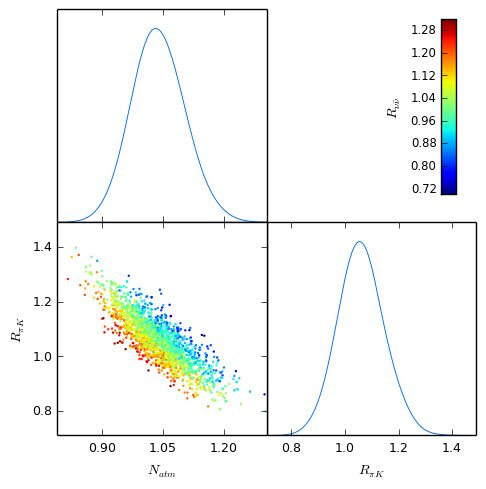

In [32]:
g = plots.getSubplotPlotter(width_inch=5)
g.settings.legend_fontsize=9
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([Tsample], ["0","3"], plot_3d_with_param="4",
                filled=True, #legend_labels=["Prior","Posterior"],
                legend_loc="upper right",)
g.export("sterile_crazy.pdf")